# Visualize keyPoints

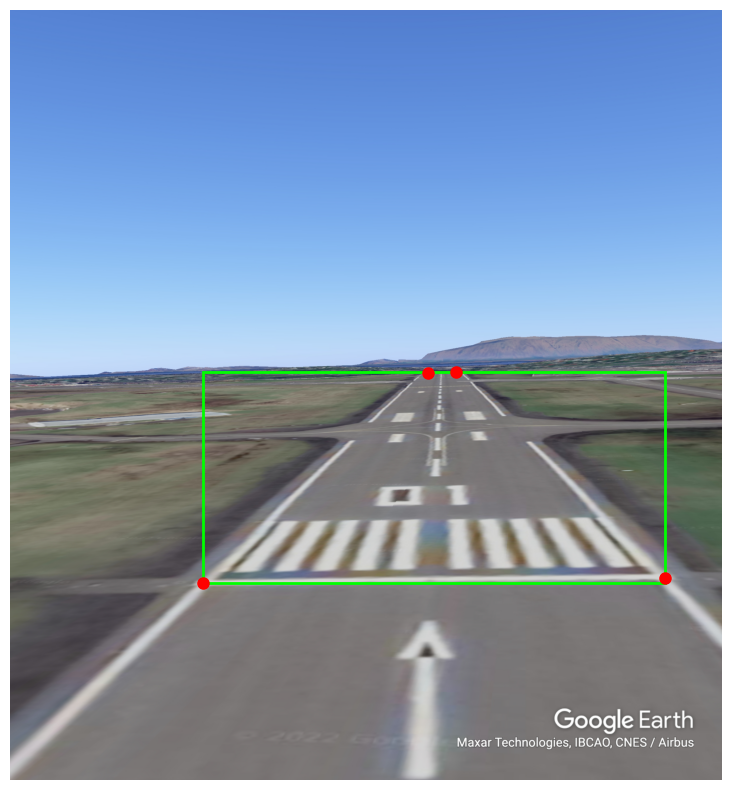

In [1]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

image_path = "/home/aws_install/data/yolonas_pose_base/images/train/BIRK_01_500_461.jpeg"
label_path = "/home/aws_install/data/yolonas_pose_base/labels/train/BIRK_01_500_461.txt"  # ton fichier txt

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image non trouvée : {image_path}")

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

H, W, _ = image.shape


with open(label_path, "r") as f:
    line = f.readline().strip()
parts = line.split()

# class, x_center_norm, y_center_norm, width_norm, height_norm
cls = parts[0]
x_center = float(parts[1])
y_center = float(parts[2])
w_box = float(parts[3])
h_box = float(parts[4])

x_min = int((x_center - w_box/2) * W)
x_max = int((x_center + w_box/2) * W)
y_min = int((y_center - h_box/2) * H)
y_max = int((y_center + h_box/2) * H)

# 4: (x, y, visibility) 
keypoints = []
for i in range(5, len(parts), 3):
    x_kp = float(parts[i]) * W
    y_kp = float(parts[i+1]) * H
    visibility = parts[i+2]  # peut être utilisé ou non
    keypoints.append((x_kp, y_kp))

plt.figure(figsize=(12, 10))
plt.imshow(image_rgb)
plt.axis("off")

rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                     edgecolor='lime', facecolor='none', linewidth=2)
plt.gca().add_patch(rect)

for (x, y) in keypoints:
    plt.plot(x, y, 'ro', markersize=8)

plt.show()
